Intuitively, if we are predicting an image of a cat vs dog, and we pass in a query image $x_{q}$ of pixels, we expect the $y_{q}$ to take on class 0 or 1. However, taking a step back, in ML setting, we often have a calibrated probability $y_{q}$ before the classifier tells us whether it is a 0 or 1 based on a decision (say if probability more than 0.5, then its 1, and 0 otherwwise). This probability is a soft label and in our scenario, should output an array 

```python
y_q = [probability of x_q being a cat 0, probability of x_q being a dog 1] = [0.5, 0.5]
```

In this case, we can say that our prediction $Y$ is a DISCRETE random variable with probability distribution $p$, and thus the entropy of $Y$ can be formally defined as:

$$\mathrm{H}(Y)= -\sum _{i=1}^{n}{\mathrm{P}(y_{i})\log \mathrm{P}(y_{i})}$$

where we are summing over all values that $Y$ took on.

In this case, it is 

```python
entropy of y_q = -( 0.5 * lg 0.5 + 0.5 * lg 0.5 ) = -(-0.5 + -0.5) = 1
```

Note we are using lg base 2 here and so our maximum entropy is 1.

- Entropy is maximum if each random variable is equi-probable.
- Entropy Loss is usually used as a loss function in ML as it penalizes "wrong predictions" and favours confident predictions.

In the image below, let's say $y$ is a random variable taking on a uniform distribution, for example, if we are predicting a cat or dog image, where $y$ is the probability output from a classifier, taking on 0 to 1. If we were to assume $y \sim U[0,1]$, then it follows that $H(y) = 1$ as $y$ will always be of $[0.5, 0.5]$ in prediction.

Let us now see two different cases if $y$ follows a gaussian distribution, $y_{1} \sim \mathcal{N_1}[0,1]$ and $y_{2} \sim \mathcal{N_2}[0,1]$

Visually, we can see that the second gaussian has a higher peak than the first, hence we can deduce that $H(y_{2}) < H(y_{1})$ because since the higher peak suggest that the points of $y_{2}$ are tightly spread around each other, and since the points are close, there is less penalty in the $\log$. Even more geometrically, if we take "uniform distribution" as the one with highest entropy, we can say that as the gaussian curve smoothes out -> becoming more uniform, then the entropy rises.

![title](entropy_distribution.png)

- [machinelearningmastery-information-entropy](https://machinelearningmastery.com/what-is-information-entropy/)
- [scipy-entropy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html)

In [5]:
from scipy.stats import entropy
from math import log2


def _entropy(y):
    """
    raw for loops without vectorization
    y: array of probabilities
    """
    
    num_samples = len(y) # no. of samples
    
    _entropy = 0
    
    for _y in y:
        
        _entropy += _y * log2(_y)
            
    _entropy = -1 * _entropy
    
    return _entropy
        
        
        
#TODO: VECTORIZE  

In [4]:
entropy([1/2, 1/2], base=2)
_entropy([1/2, 1/2])


-1.0

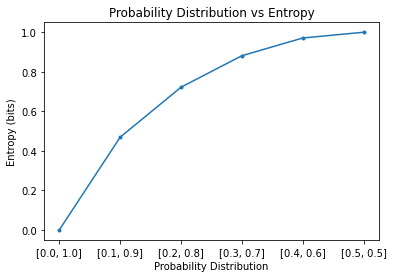

In [7]:
# Reference to machine learning mastery
# compare probability distributions vs entropy
from math import log2
from matplotlib import pyplot
 
# calculate entropy
def entropy(events, ets=1e-15):
	return -sum([p * log2(p + ets) for p in events])
 
# define probabilities
probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
# create probability distribution
dists = [[p, 1.0 - p] for p in probs]
# calculate entropy for each distribution
ents = [entropy(d) for d in dists]
# plot probability distribution vs entropy
pyplot.plot(probs, ents, marker='.')
pyplot.title('Probability Distribution vs Entropy')
pyplot.xticks(probs, [str(d) for d in dists])
pyplot.xlabel('Probability Distribution')
pyplot.ylabel('Entropy (bits)')
pyplot.show()
